In [ ]:
install.packages('gsheet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Goes with PCA_example.csv file in Google Drive

library(gsheet)
dat <- read.csv(url("https://raw.githubusercontent.com/RInterested/DATASETS/gh-pages/semiconductors.csv"))
head(dat)
colnames(dat)[7] <- "lattice"
colnames(dat)[2] <- "atomic.no"
dat1 <- subset(dat[1:15,1:3])
row.names(dat1) <- dat1$compounds
dat1 <- dat1[,-1]
head(dat1)

,compounds,atomic.no.,melting.point,VE,radii,EN,lattice.const..ang.
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AIN,10,498.0,4,1.135,-1.21,3.11
2,AIP,14,625.0,4,0.435,-0.68,5.47
3,AIAs,23,1011.5,4,0.260,-0.63,5.66
4,AISb,32,918.5,4,-0.090,-0.50,6.14
5,GaN,19,182.5,4,1.155,-1.15,3.16
6,GaP,23,309.5,4,0.455,-0.62,5.45


,atomic.no,melting.point
,<dbl>,<dbl>
AIN,10,498.0
AIP,14,625.0
AIAs,23,1011.5
AISb,32,918.5
GaN,19,182.5
GaP,23,309.5


,atomic.no,melting.point
,<dbl>,<dbl>
AIN,-1.7596934,-0.3184053
AIP,-1.3968700,0.2290334
AIAs,-0.5805174,1.8950577
AISb,0.2358352,1.4941774
GaN,-0.9433408,-1.6783812
GaP,-0.5805174,-1.1309424


,atomic.no,melting.point
atomic.no,1.0000000,0.2964217
melting.point,0.2964217,1.0000000


1.296422,0.0000000
0.000000,0.7035783


-0.7071068,0.7071068
-0.7071068,-0.7071068


0.7071068,0.7071068
0.7071068,-0.7071068


,PC1,PC2
,<dbl>,<dbl>
atomic.no,0.7071068,0.7071068
melting.point,0.7071068,-0.7071068


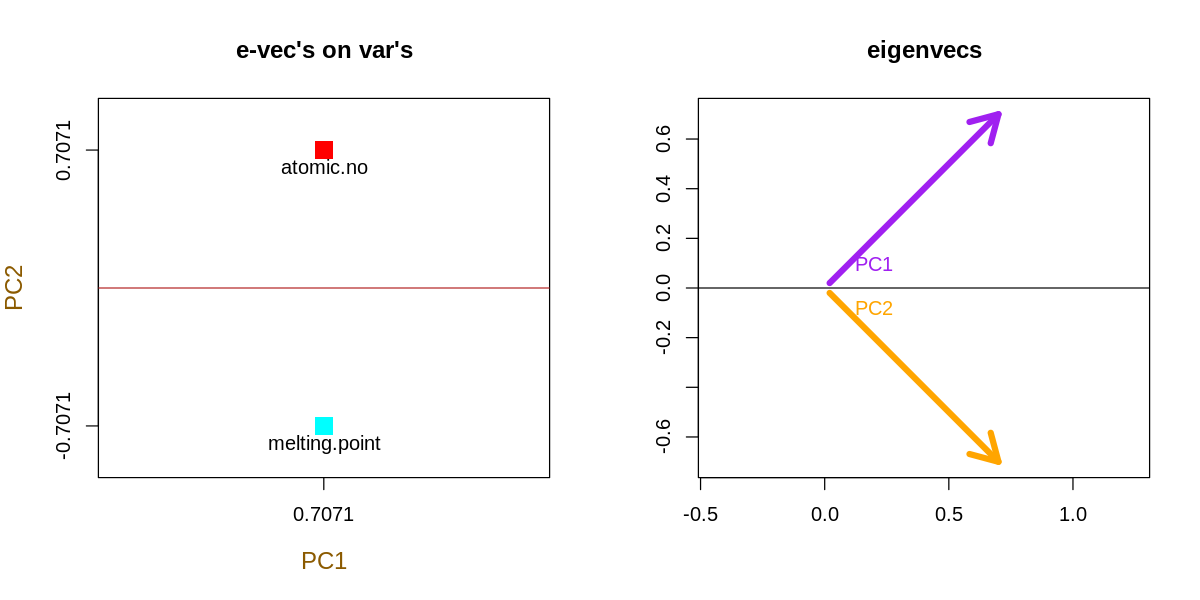

In [ ]:
#LINEAR ALGEBRA:

scaled_dat <- as.data.frame(scale(dat1,center=T))
head(scaled_dat)
X <- as.matrix(scaled_dat)

C <- cov(X) # Covariance matrix
C

lambda <- eigen(C)$values # Eigenvalues
lambda_matrix <- diag(2)*eigen(C)$values # Eigenvalues matrix
lambda_matrix


e_vectors <- eigen(C)$vectors # Eigenvectors matrix (2 x 2)
e_vectors

# To make it congruous with built-in formulas, we should probably
# change the sign of the first eigenvector from [-.7,-.7] to [.7, .7]:

e_vectors[,1] <- e_vectors[,1]*-1
e_vectors
colnames(e_vectors) <- c("PC1","PC2")

# Graphic representation of the loadings - it shows which parameters
# (i.e. variables) move together or separately
# with different eigenvectors. Let's see the effect on variables of the loadings on
# PC1 and PC2:

ev <- as.data.frame(e_vectors)
row.names(ev) <- c("atomic.no","melting.point")
ev

plot.new()
par(mfrow=c(1,2))
options(repr.plot.width=10, repr.plot.height=5)

plot(ev, pch = 15, col = c("red","cyan"), cex = 2, cex.lab = 1.2,
     col.lab = "orange4", xaxt ="n", yaxt ="n",
     ylim = c(-.9,.9), main = "e-vec's on var's")
axis1 = axis(1, at = 0.7071)
axis2 = axis(2, at = c(-0.7071, 0.7071))
abline(h = 0, col = "firebrick")
with(ev, text(PC2 ~ PC1, labels = as.factor(rownames(ev)),
              pos = 1))

plot(ev, main = "eigenvecs", xlab=NA, ylab=NA, asp=1 , type ="n", xlim=c(0,.8))
abline(h=0)
arrows(x0 = 0.02, y0 = 0.02, x1 = 0.7, y1 = 0.7, lwd = 5, col="purple")
arrows(x0 = 0.02, y0 = -0.02, x1 = 0.7, y1 = -0.7, lwd = 5, col="orange")
legend(x = 0, y = 0.18, "PC1", bty = "n",
       text.col = "purple", )
legend(x = 0, y = 0, "PC2", bty = "n",
       text.col = "orange")

In [ ]:
score_matrix <-  X %*% e_vectors # Score matrix = (15 x 2) %*% (2 x 2) = (15 x 2)
# Same as
head(t(t(e_vectors) %*% t(X)))
colnames(score_matrix) <-c("PC1","PC2")
head(score_matrix)


# Compare to... R Packages:
# For scores:

auto <- prcomp(dat1, center = T, scale = T)
# or auto <- prcomp(scaled_dat)
head(auto$x)

#or

auto2 <- princomp(scaled_dat)
head(auto2$scores)

# and for eigenvectors:

e_vectors
auto$rotation
auto2$loadings

# and for eigenvalues:

lambda
auto$sdev^2
princomp(covmat=C)$sd^2


# We can use svd: http://www.ime.usp.br/~pavan/pdf/MAE0330-PCA-R-2013

svd_scaled_dat <-svd(scale(dat1))
eigen_vectors <- svd_scaled_dat$v
eigen_values <- (svd_scaled_dat$d/sqrt(nrow(dat1) - 1))^2
scores<-scale(dat1) %*% eigen_vectors


#END OF LINEAR ALGEBRA

,PC1,PC2
AIN,-1.4694377,-1.0191446
AIP,-0.8257852,-1.1496874
AIAs,0.9295204,-1.7504960
AISb,1.2233036,-0.8897823
GaN,-1.8538374,0.5197520
GaP,-1.2101848,0.3892092


,PC1,PC2
AIN,-1.4694377,-1.0191446
AIP,-0.8257852,-1.1496874
AIAs,0.9295204,-1.7504960
AISb,1.2233036,-0.8897823
GaN,-1.8538374,0.5197520
GaP,-1.2101848,0.3892092


,PC1,PC2
AIN,-1.4694377,-1.0191446
AIP,-0.8257852,-1.1496874
AIAs,0.9295204,-1.7504960
AISb,1.2233036,-0.8897823
GaN,-1.8538374,0.5197520
GaP,-1.2101848,0.3892092


,Comp.1,Comp.2
AIN,-1.4694377,-1.0191446
AIP,-0.8257852,-1.1496874
AIAs,0.9295204,-1.7504960
AISb,1.2233036,-0.8897823
GaN,-1.8538374,0.5197520
GaP,-1.2101848,0.3892092


PC1,PC2
0.7071068,0.7071068
0.7071068,-0.7071068


,PC1,PC2
atomic.no,0.7071068,0.7071068
melting.point,0.7071068,-0.7071068



Loadings:
              Comp.1 Comp.2
atomic.no      0.707  0.707
melting.point  0.707 -0.707

               Comp.1 Comp.2
SS loadings       1.0    1.0
Proportion Var    0.5    0.5
Cumulative Var    0.5    1.0

[1] 1.2964217 0.7035783

[1] 1.2964217 0.7035783

Comp.1    Comp.2 
1.2964217 0.7035783

[1] 64.82108

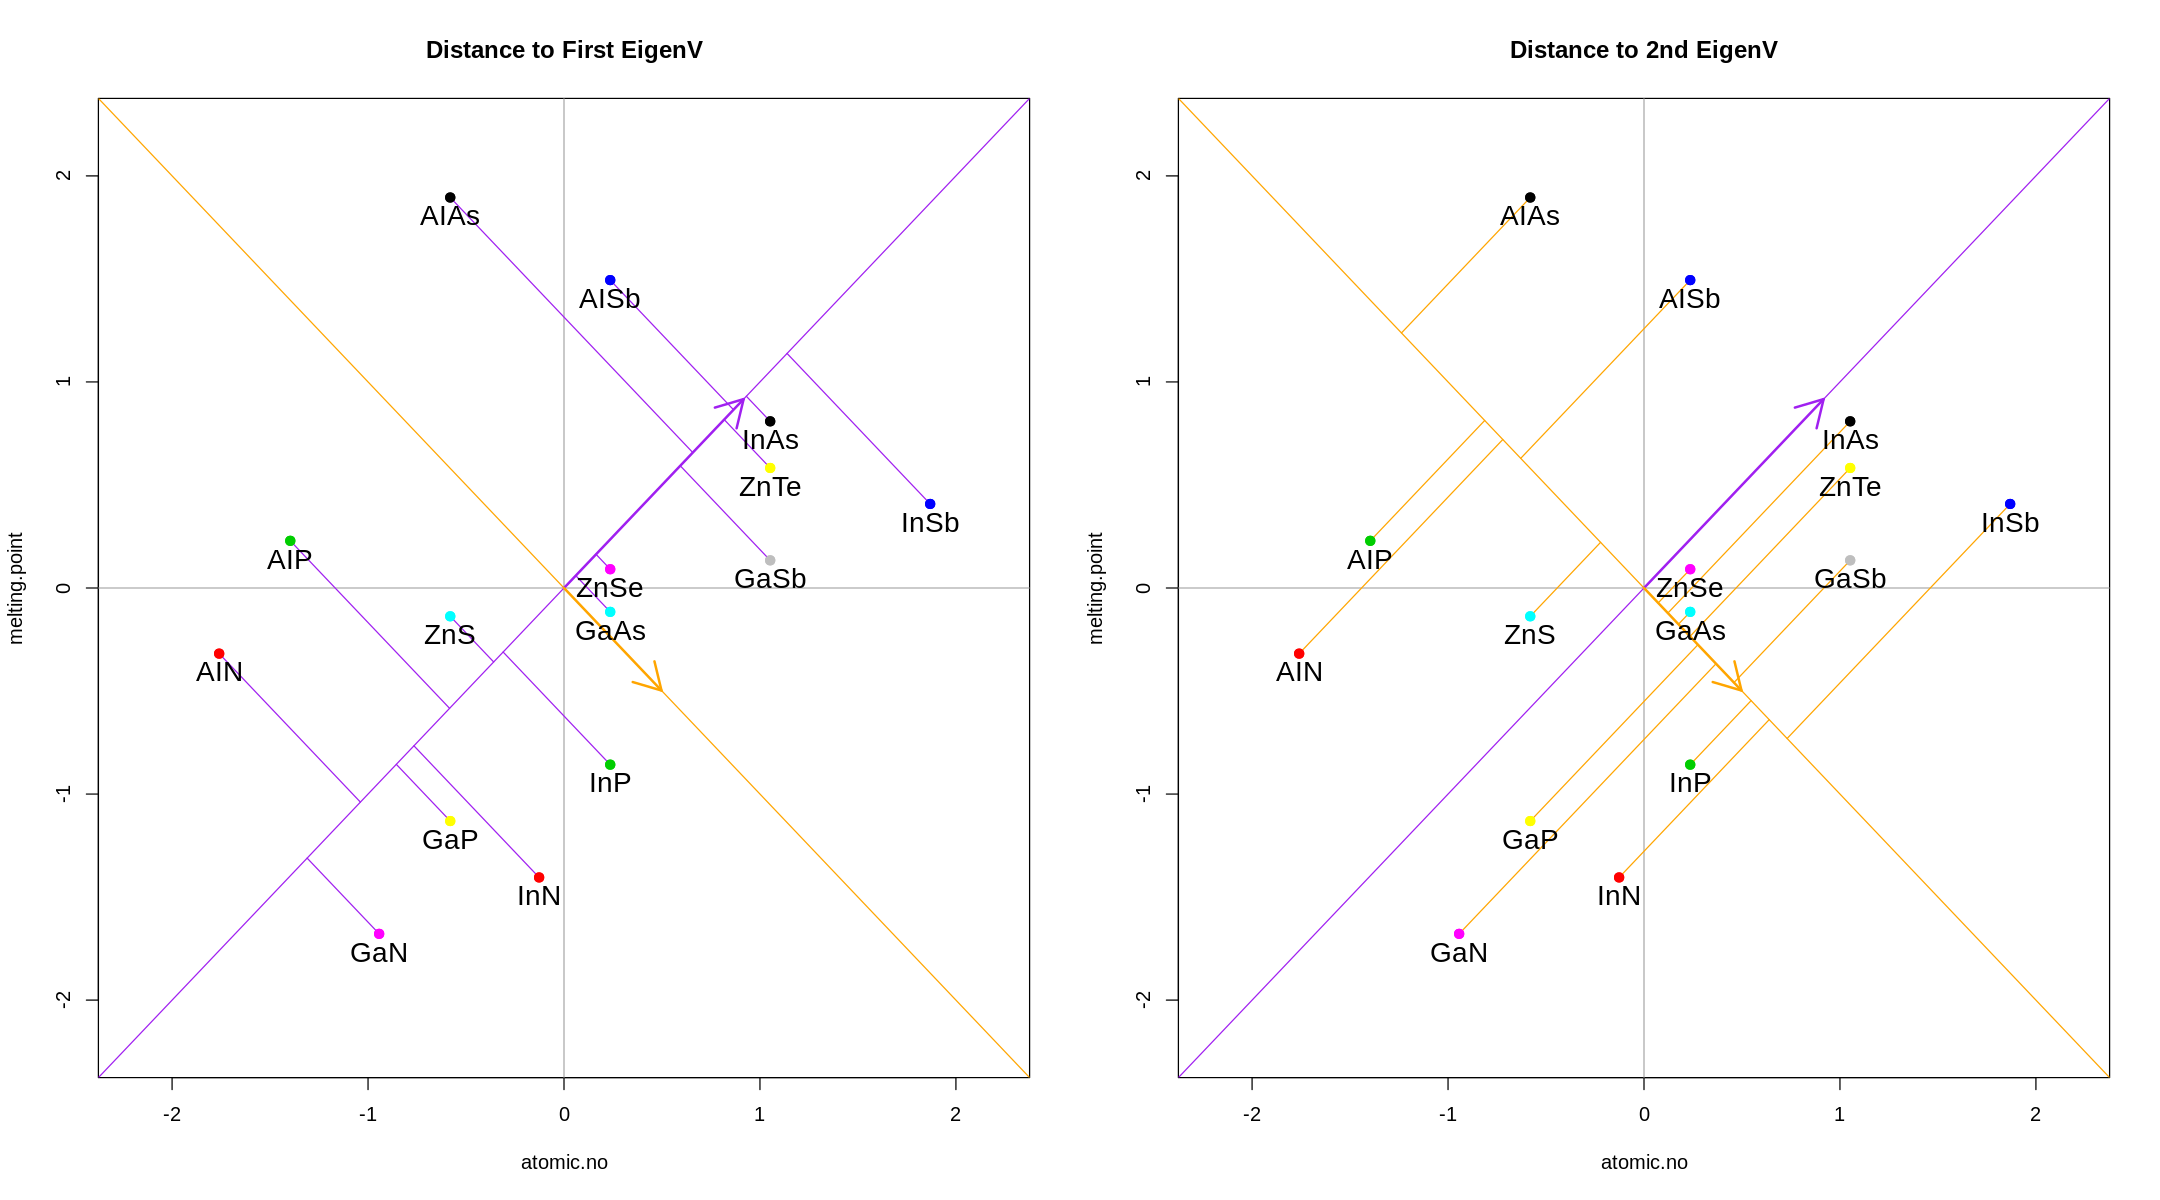

In [ ]:
#relative influence of eigenvalues, for instance PC1:

eigen(C)$values[1]/sum(eigen(C)$values) * 100


par(mfrow=c(1,2))
options(repr.plot.width=18, repr.plot.height=10)

#FIRST PLOT:


plot(melting.point ~ atomic.no, col = as.factor(rownames(scaled_dat)),
     main="Distance to First EigenV", pch = 19,
     xlim=c(-2.2, 2.2), ylim = c(-2.2,2.2), data = scaled_dat)
abline(v=0,h=0, col = "dark gray")

#Overlap pertinent evectors


abline(0, e_vectors[2,1]/e_vectors[1,1],col='purple')
abline(0, e_vectors[1,2]/e_vectors[2,2],col='orange')

arrows(x0 = 0, y0 = 0, x1 = lambda[1]*e_vectors[1,1],
       y1 = lambda[1]*e_vectors[2,1],col="purple",lwd=2)
arrows(x0 = 0, y0 = 0, x1 = lambda[2]*e_vectors[1,2],
       y1 = lambda[2]*e_vectors[2,2],col="orange", lwd=2)

#Plot the lines from first evector to points

line1 <- c(0, e_vectors[2,1]/e_vectors[1,1])

perp.segment.coord <- function(x0, y0, line1){

  #finds endpoint for a perpendicular segment from the point (x0,y0) to the line1

  a <- line1[1]  #intercept
  b <- line1[2]  #slope

  x1 <- (x0 + b * y0 - a * b)/(1 + b^2)
  y1 <- a + b * x1
  list(x0 = x0, y0 = y0, x1 = x1, y1 = y1)
}

ss <- perp.segment.coord(scaled_dat$atomic.no, scaled_dat$melting.point, line1)
# do.call(segments, ss)
# which is the same as:
segments(x0 = ss$x0, x1 = ss$x1, y0 = ss$y0, y1 = ss$y1, col='purple')

points(melting.point ~ atomic.no, col = as.factor(rownames(scaled_dat)), pch = 19, data = scaled_dat)
with(scaled_dat,text(melting.point ~ atomic.no, labels = as.factor(rownames(scaled_dat)),
                     pos=1, cex=1.4))

#SECOND PLOT:

plot(melting.point ~ atomic.no, col = as.factor(rownames(scaled_dat)), pch = 19,
     main="Distance to 2nd EigenV",
     xlim=c(-2.2, 2.2), ylim = c(-2.2,2.2), data = scaled_dat)

abline(v = 0,h = 0, col = "dark gray")

#Overlap pertinent evectors



abline(0, e_vectors[2,1]/e_vectors[1,1],col='purple')
abline(0, e_vectors[1,2]/e_vectors[2,2],col='orange')

arrows(x0 = 0, y0 = 0, x1 = lambda[1] * e_vectors[1,1],
       y1 = lambda[1] * e_vectors[2,1],col="purple",lwd=2)
arrows(x0 = 0, y0 = 0, x1 = lambda[2] * e_vectors[1,2],
       y1 = lambda[2]*e_vectors[2,2],col="orange", lwd=2)


line1a <- c(0, e_vectors[2,2]/e_vectors[1,2])

ssa <- perp.segment.coord(scaled_dat$atomic.no, scaled_dat$melting.point, line1a)
# do.call(segments, ss)
# which is the same as:
segments(x0 = ssa$x0, x1 = ssa$x1, y0 = ssa$y0, y1 = ssa$y1, col='orange')


points(melting.point ~ atomic.no, col = as.factor(rownames(scaled_dat)), pch = 19, data = scaled_dat)

with(scaled_dat,text(melting.point ~ atomic.no, labels = as.factor(rownames(scaled_dat)),
                     pos=1, cex=1.4))

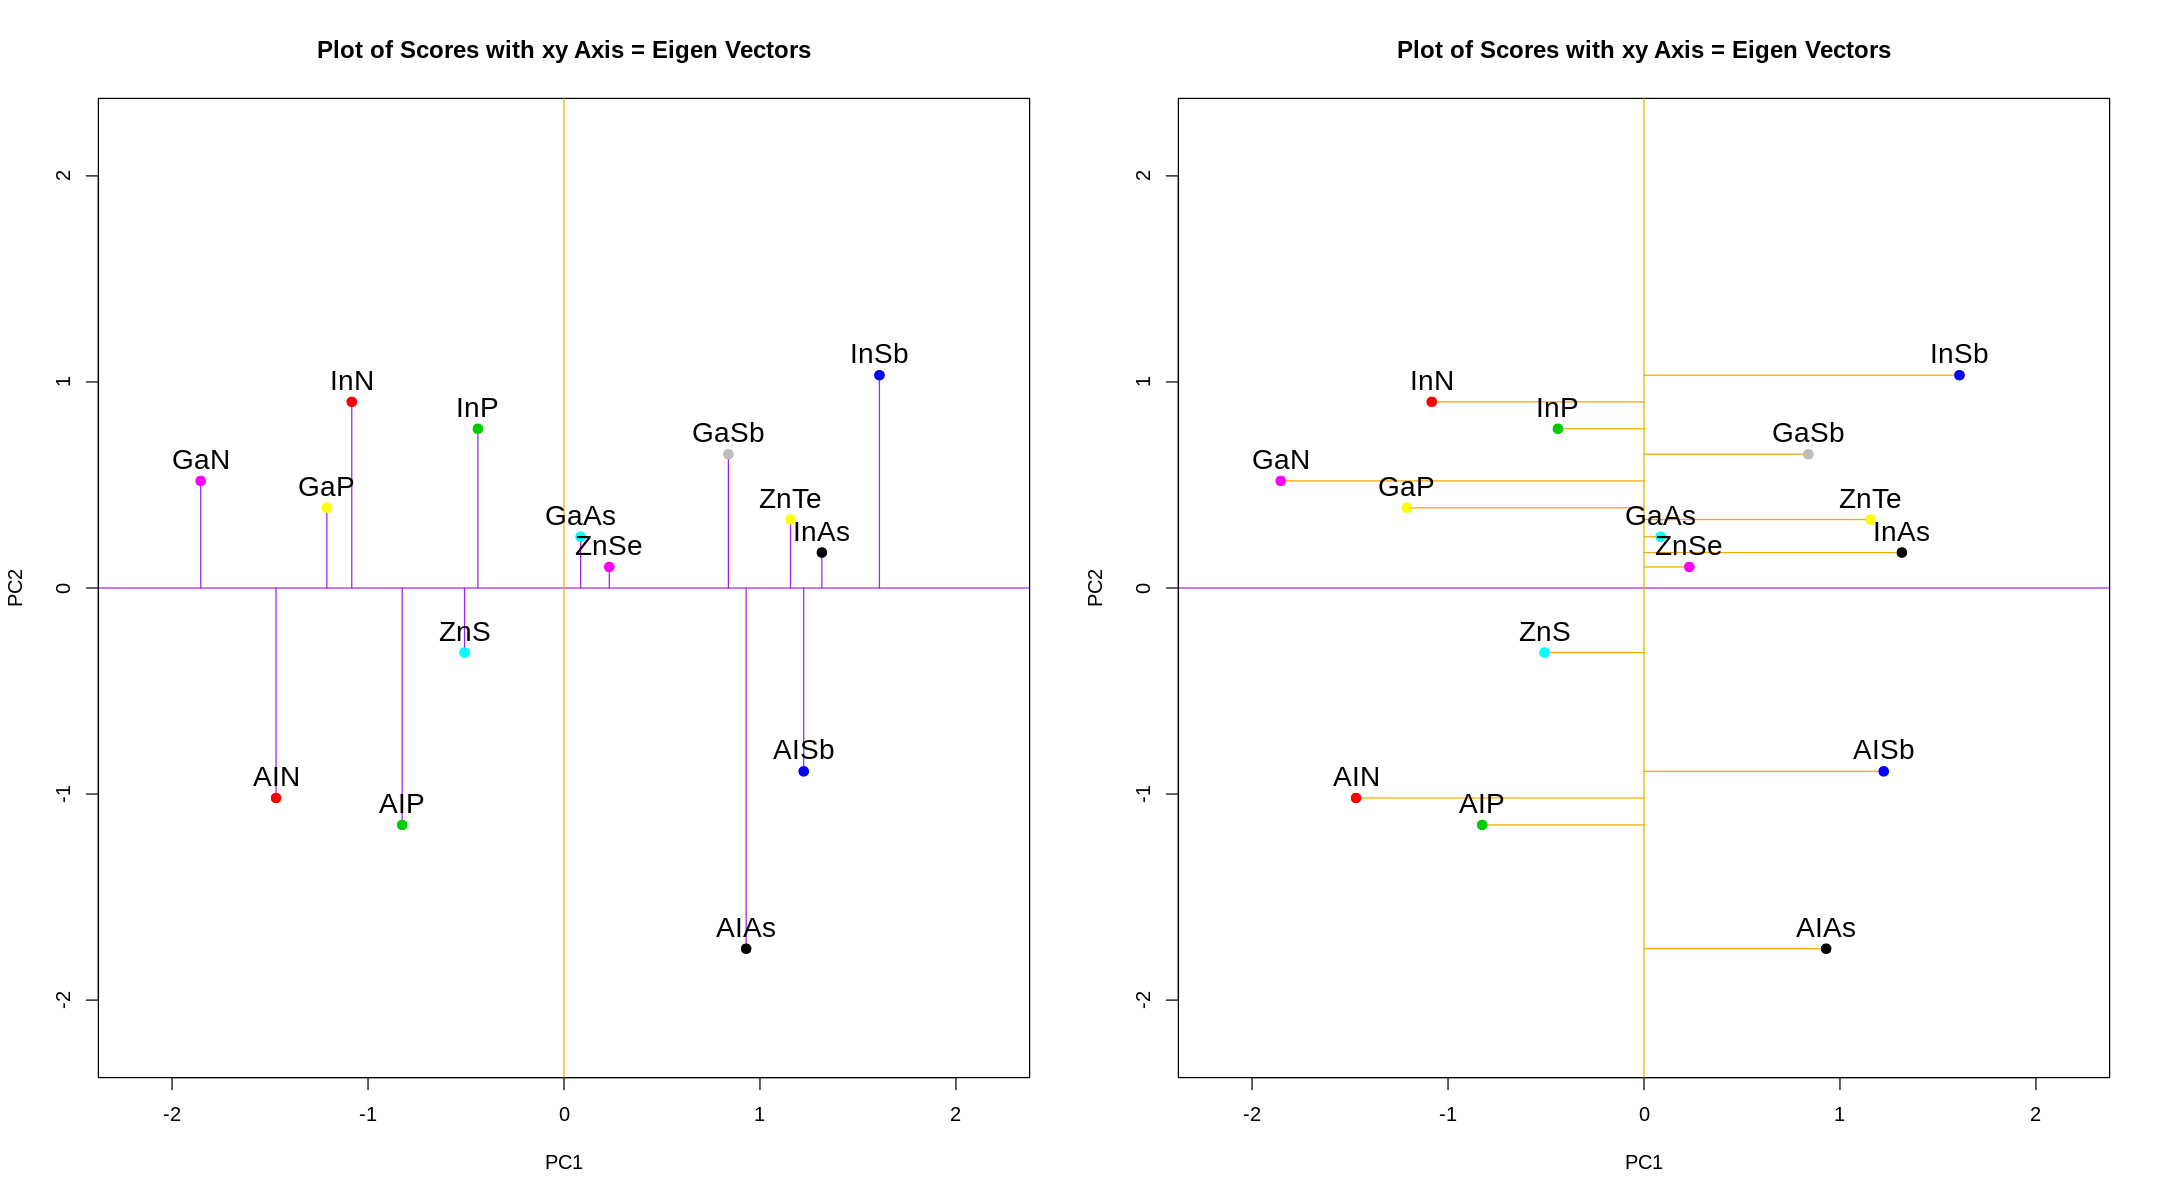

In [ ]:
#THIRD PLOT:

#Now compare side-by-side with plotted first and second column Scores

score <- as.data.frame(score_matrix)

par(mfrow=c(1,2))
options(repr.plot.width=18, repr.plot.height=10)
plot(PC2 ~ PC1, col = as.factor(rownames(score)), pch = 19,
     main='Plot of Scores with xy Axis = Eigen Vectors',
     xlim=c(-2.2, 2.2), ylim = c(-2.2,2.2), xlab='PC1', ylab='PC2',data=score)

abline(h = 0, col = 'purple')
abline(v = 0, col='orange')


perp.segment.horiz <- function(x0, y0){

  #finds endpoint for a perpendicular segment from the point (x0,y0) to the horizontal
  x1 <- x0
  y1 <- 0
  list(x0 = x0, y0 = y0, x1 = x1, y1 = y1)
}

ss1 <- perp.segment.horiz(score[,1], score[,2])

segments(x0 = ss1$x0, x1 = ss1$x1, y0 = ss1$y0, y1 = ss1$y1, col='purple')


points(PC2 ~ PC1, col=as.factor(rownames(score)), pch = 19, xlab='V1', ylab='V2',data=score)
with(score,text(PC2 ~ PC1, labels=as.factor(rownames(score)), pos = 3, cex=1.4))



#FOURTH PLOT:

plot(PC2 ~ PC1, col=as.factor(rownames(score)),
     main='Plot of Scores with xy Axis = Eigen Vectors',
     pch = 19, xlim=c(-2.2, 2.2), ylim = c(-2.2,2.2),
     xlab='PC1', ylab='PC2',data=score)

abline(h = 0, col = 'purple')
abline(v = 0, col ='orange')


perp.segment.vert <- function(x0, y0){

  #finds endpoint for a perpendicular segment from the point (x0,y0) to the horizontal
  x1 <- 0
  y1 <- y0

  list(x0 = x0, y0 = y0, x1 = x1, y1 = y1)
}

ss1a <- perp.segment.vert(score[,1], score[,2])
segments(x0 = ss1a$x0, x1 = ss1a$x1, y0 = ss1a$y0, y1 = ss1a$y1, col='orange')


points(PC2 ~ PC1, col=as.factor(rownames(score)), pch = 19, xlab='V1', ylab='V2',data=score)

with(score,text(PC2 ~ PC1, labels=as.factor(rownames(score)), pos = 3, cex=1.4))

,PC1,PC2
,<dbl>,<dbl>
AIN,-1.4694377,-1.0191446
AIP,-0.8257852,-1.1496874
AIAs,0.9295204,-1.7504960
AISb,1.2233036,-0.8897823
GaN,-1.8538374,0.5197520
GaP,-1.2101848,0.3892092


,PC1,PC2
AIN,-1.4694377,-1.0191446
AIP,-0.8257852,-1.1496874
AIAs,0.9295204,-1.7504960
AISb,1.2233036,-0.8897823
GaN,-1.8538374,0.5197520
GaP,-1.2101848,0.3892092


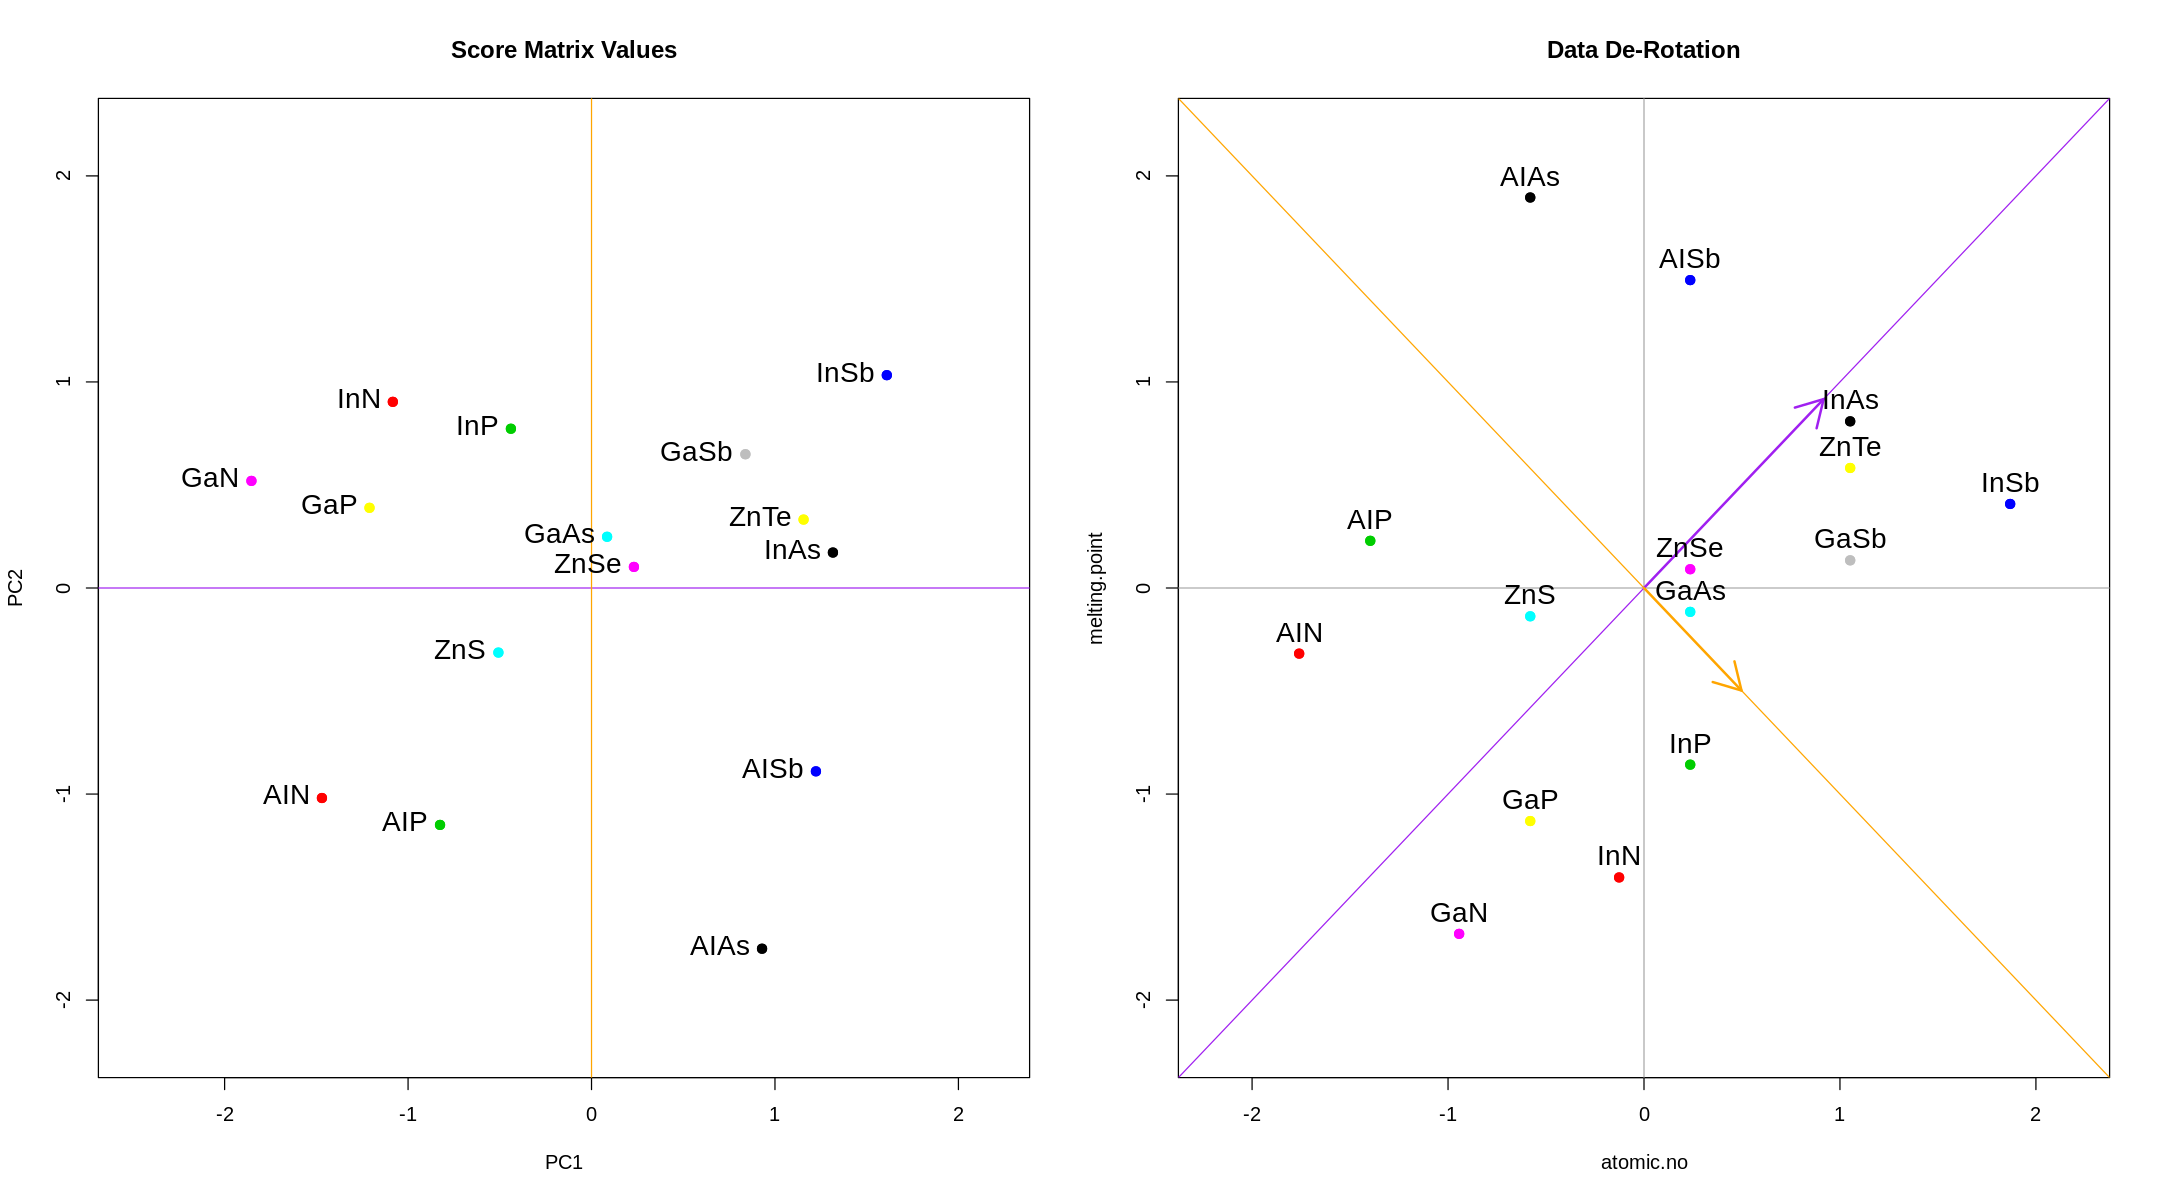

In [ ]:
##SECOND PART RESTORING THE DATA:

dat2 <- score
head(dat2)
X1 <- as.matrix(dat2)
head(X1)


par(mfrow=c(1,2))

# PLOT 5: SCORES


plot(PC2 ~ PC1, col = as.factor(rownames(dat2)),
     pch = 19, xlim=c(-2.5, 2.2), ylim = c(-2.2,2.2),
     main="Score Matrix Values", data = dat2)

abline(v = 0,h = 0, col = c("purple","orange"))


points(PC2 ~ PC1, col = as.factor(rownames(dat2)), xlim=c(-2.8,2.8),ylim=c(-2.8,2.8),pch = 19,data = dat2)

with(dat2,text(PC2 ~ PC1, labels=as.factor(rownames(dat2)), pos=2, cex=1.4))

# PLOT 6: ROTATING BACK...

rot <- X1 %*% solve(e_vectors)

rot1 <- as.data.frame(rot)
colnames(rot1) <- c("atomic.no","melting.point")

plot(melting.point ~ atomic.no, col = as.factor(rownames(rot1)), xlim=c(-2.2, 2.2), ylim = c(-2.2,2.2),
     pch = 19,main="Data De-Rotation",data = rot1)

abline(v = 0, h = 0, col = "dark gray")


abline(0, e_vectors[2,1]/e_vectors[1,1],col='purple')
abline(0, e_vectors[1,2]/e_vectors[2,2],col='orange')

arrows(x0 = 0, y0 = 0, x1 = lambda[1]*e_vectors[1,1],
       y1 = lambda[1]*e_vectors[2,1], lwd = 2, col="purple")
arrows(x0 = 0, y0 = 0, x1 = lambda[2]*e_vectors[1,2],
       y1 = lambda[2]*e_vectors[2,2], lwd = 2, col="orange")

points(melting.point ~ atomic.no, col = as.factor(rownames(rot1)), xlim=c(-2.8,2.8),ylim=c(-2.8,2.8),
       pch = 19,main="Data Rotation",data = rot1)
with(rot1,text(melting.point ~ atomic.no, labels=as.factor(rownames(rot1)), pos=3, cex=1.4))

Standard deviations (1, .., p=2):
[1] 1.1386052 0.8387958

Rotation (n x k) = (2 x 2):
                    PC1        PC2
atomic.no     0.7071068  0.7071068
melting.point 0.7071068 -0.7071068

,PC1,PC2
atomic.no,0.7071068,0.7071068
melting.point,0.7071068,-0.7071068


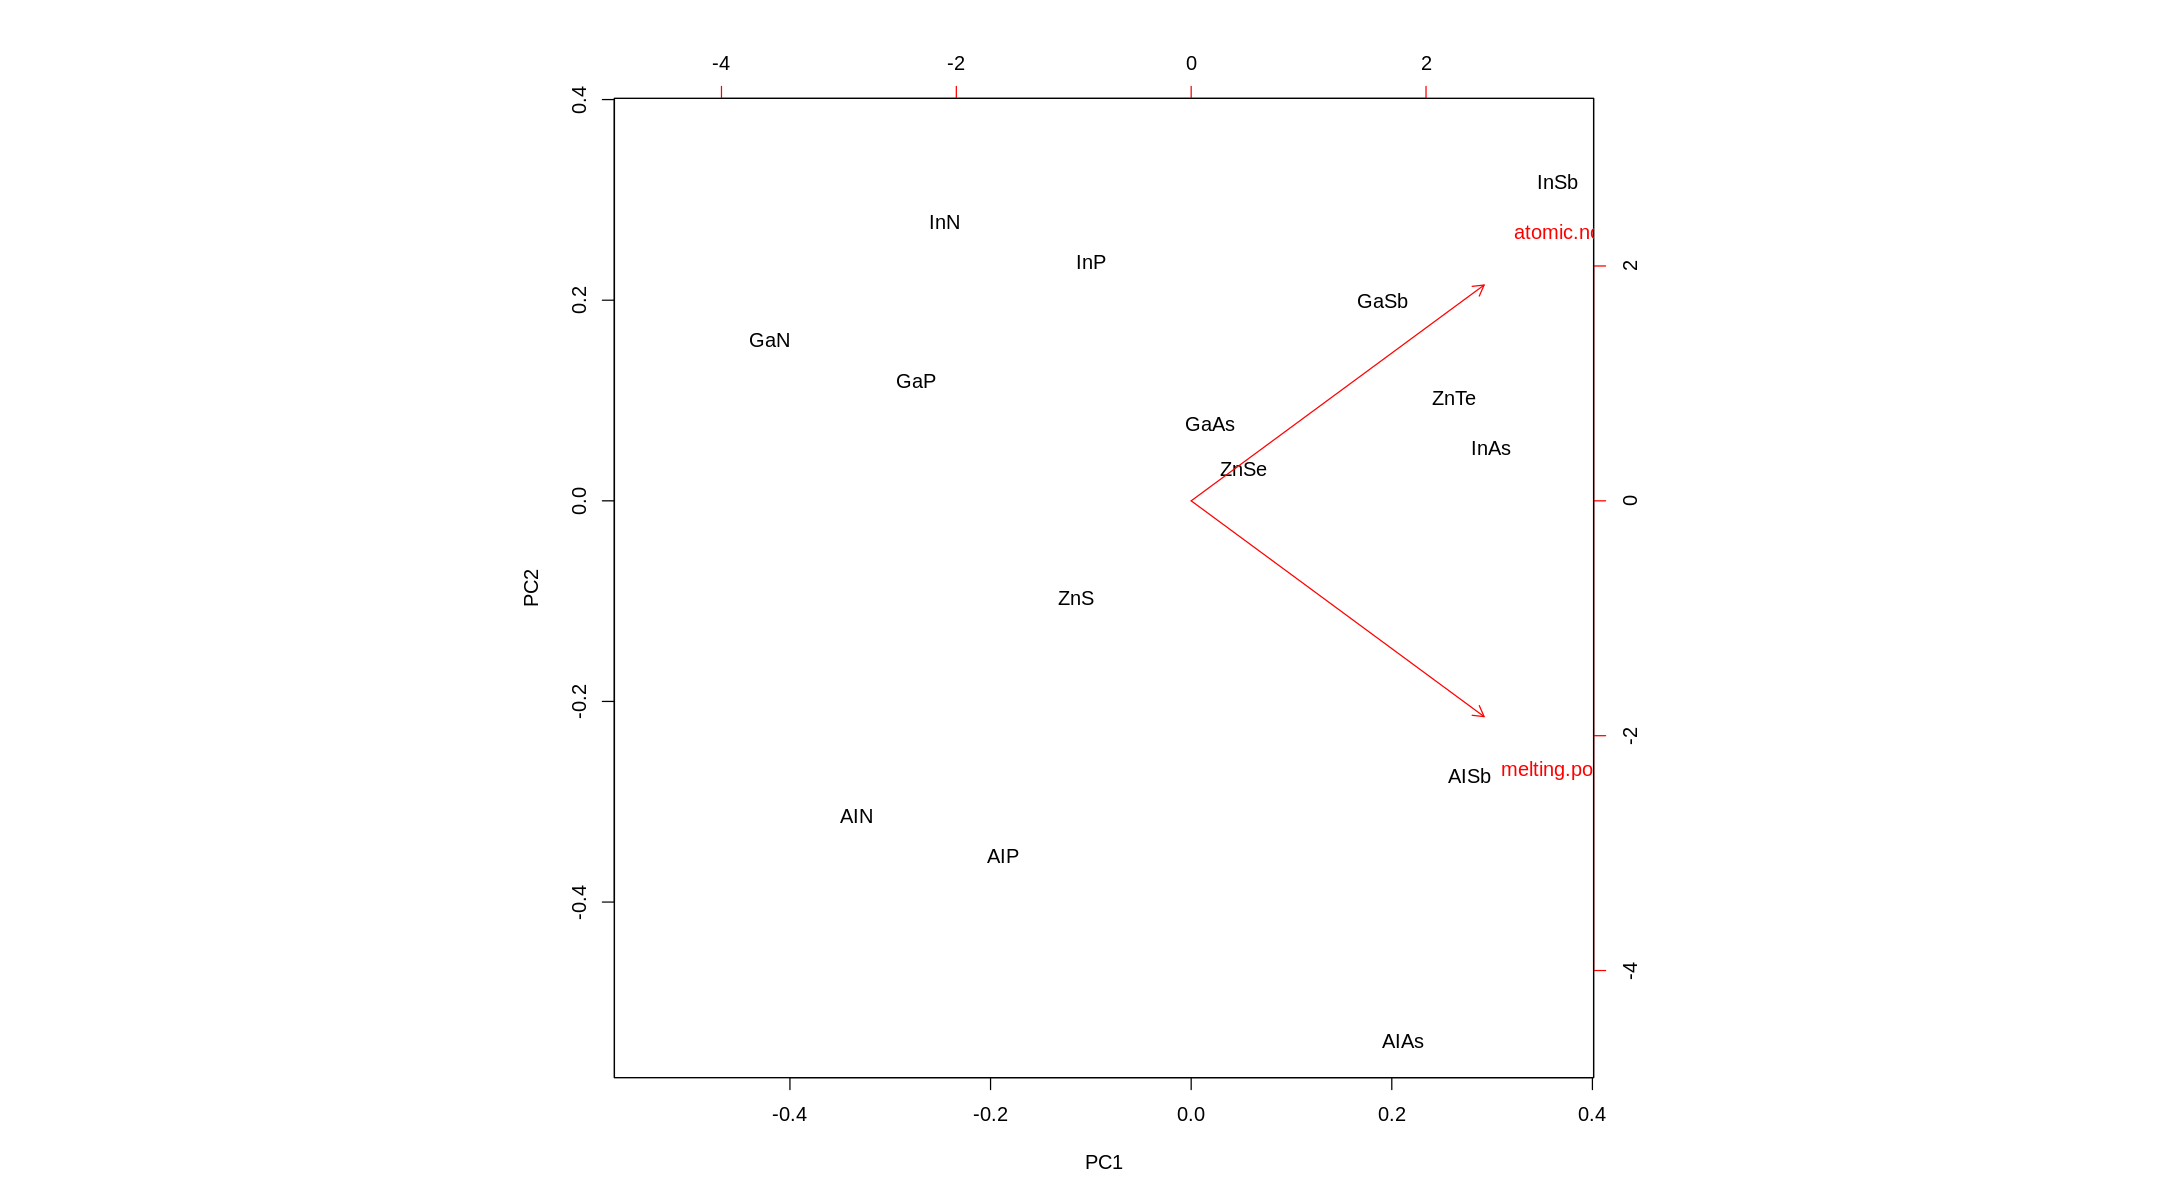

In [ ]:
PCA <- prcomp(dat1, center = T, scale = T)
PCA
PCA$rotation
options(repr.plot.width=18, repr.plot.height=10)
biplot(PCA)

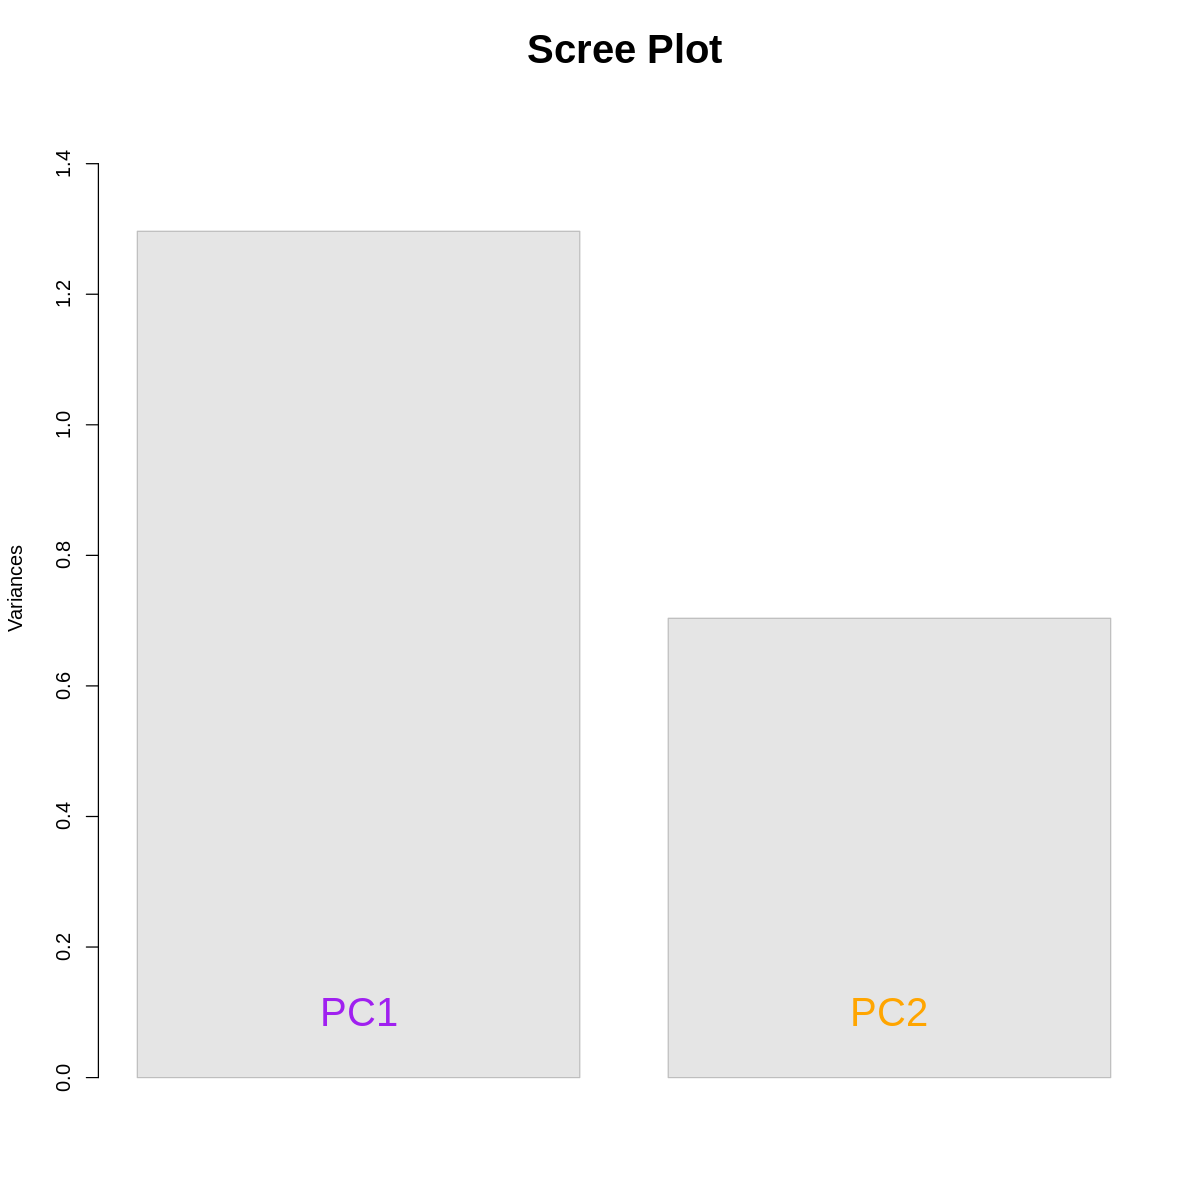

In [ ]:
#Scree plot:
options(repr.plot.width=10, repr.plot.height=10)
screeplot(PCA, npcs = 2, ylim=c(0,1.5), border = "gray", col="gray90", main="Scree Plot", cex.main=2)
text(x=c(0.7,1.9),y=c(0.1,0.1),c("PC1","PC2"), col=c("purple","orange"), cex=2)